# Data Preparation for classifying news categories with a Convolutional Neural Network (NEW)

In [11]:
import collections
import numpy as np
import pandas as pd
import re

from argparse import Namespace
from matplotlib import pyplot as plt

In [12]:
args = Namespace(
    raw_dataset_csv_1="../data/original/ag_news_train.csv",
    raw_dataset_csv_2="../data/original/ag_news_test.csv",
    train_proportion=0.7,
    val_proportion=0.15,
    test_proportion=0.15,
    output_munged_csv="../data/processed/News_Category_Dataset_with_splits.csv",
    seed=1337
)

In [13]:
# Read raw data
news_1 = pd.read_csv(args.raw_dataset_csv_1, header=0)
news_1 = news_1.sample(9000)
news_2 = pd.read_csv(args.raw_dataset_csv_2, header=0)
news = pd.merge(news_1, news_2, how="outer")
news["text"] = news["Title"] + ". " + news["Description"]
news.rename(columns={"Class Index":"category"}, inplace=True)
news.drop(axis=1, columns=["Title", "Description"], inplace=True)
news

,category,text
0,3,Dodge Charger image released. NEW YORK (CNN/Mo...
1,3,Wal-Mart fights Prop 72 in California. World #...
2,2,Back in the Saddle. Howard senior Marcos Moren...
3,4,"German software pirate, and his father, get ja..."
4,3,San Diego #39;s credit rating suspended. SAN D...
...,...,...
16595,1,Around the world. Ukrainian presidential candi...
16596,2,Void is filled with Clement. With the supply o...
16597,2,Martinez leaves bitter. Like Roger Clemens did...
16598,3,5 of arthritis patients in Singapore take Bext...


In [14]:
# Splitting train by category
# Create dict
label_dict = {1:"World", 2:"Sports", 3:"Business", 4:"Sci/Tech"}
by_label = collections.defaultdict(list)
for _, row in news.iterrows():
    row.category = label_dict[row.category]
    by_label[row.category].append(row.to_dict())

In [15]:
# Create split data
final_list = []
np.random.seed(args.seed)
for _, item_list in sorted(by_label.items()):
    np.random.shuffle(item_list)
    n = len(item_list)
    n_train = int(args.train_proportion*n)
    n_val = int(args.val_proportion*n)
    n_test = int(args.test_proportion*n)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
    for item in item_list[n_train+n_val:]:
        item['split'] = 'test'  
    
    # Add to final list
    final_list.extend(item_list)

In [16]:
# Write split data to file
final_news = pd.DataFrame(final_list)

In [17]:
final_news.split.value_counts()

split
train    11619
test      2494
val       2487
Name: count, dtype: int64

In [18]:
final_news.head()

,category,text,split
0,Business,Guidant merges with Johnson and Johnson. India...,train
1,Business,British Energy seeks to delist. British Energy...,train
2,Business,"GE to Buy Back \$15 Bln in Stock, Raises Divid...",train
3,Business,BHP retains confidence in China. BHP Billiton ...,train
4,Business,"Asian Stocks Lower, Greenspan Awaited. SINGAP...",train


In [19]:
# Write munged data to CSV
final_news.to_csv(args.output_munged_csv, index=False)

,category,text,split,length
0,Business,Guidant merges with Johnson and Johnson. India...,train,228
1,Business,British Energy seeks to delist. British Energy...,train,173
2,Business,"GE to Buy Back \$15 Bln in Stock, Raises Divid...",train,276
3,Business,BHP retains confidence in China. BHP Billiton ...,train,196
4,Business,"Asian Stocks Lower, Greenspan Awaited. SINGAP...",train,286
...,...,...,...,...
16595,World,Turkish engineer for US firm killed in Afghani...,test,266
16596,World,Senate Hears Testimony on Porn Addiction (AP)....,test,221
16597,World,Flawed cable insulation suspected for causing ...,test,268
16598,World,"Afghan-Coalition Soldiers Kill 3, Wound 2 at C...",test,233


<function matplotlib.pyplot.show(close=None, block=None)>

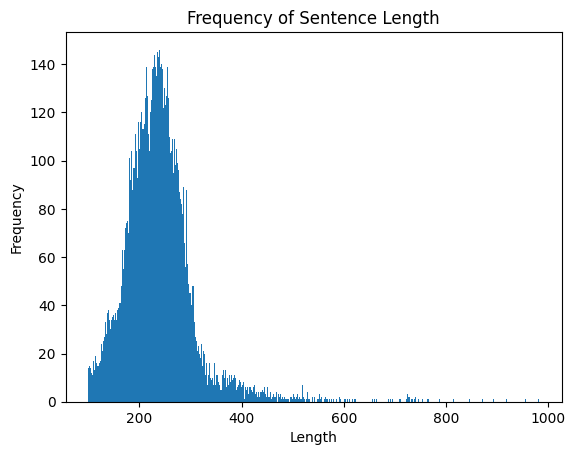

In [20]:
final_news['length'] = final_news['text'].apply(lambda x: len(x))
len_train = final_news.groupby('length').count()

sent_length = len_train.index.tolist()
sent_freq = len_train['text'].tolist()
display(final_news)
# 绘制句子长度及出现频数统计图
plt.bar(sent_length, sent_freq,2)
plt.title("Frequency of Sentence Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show